# ★ Trigonometric Interpolation And The FFT ★

In [2]:
# Import modules
import math
import cmath
import numpy as np
import scipy
import matplotlib.pyplot as plt

# 10.1 The Fourier Transform

## Lemma : Primitive roots pf unity

Let $\omega$ be a primitive bth root of unity and k be an integer. Then

### $\sum_{j=0}^{n-1}\omega^{jk} = 
\left\{\begin{matrix}
n & \text{if k/n is an integer } \\ 
0 & \text{otherwise} 
\end{matrix}\right.$

## Definition

The Discrete Fourier Transform (DFT) of $x = [x_0,\cdots,x_{n-1}]^T$ is the n-dimensional vector $y = [y_0,\cdots,y_{n-1}]$, where $\omega = e^{-i2\pi/n}$ and

### $y_k = \frac{1}{\sqrt{n}}\sum_{j=0}^{n-1}x_j\omega^{jk}$

## Definition

The magnitude of a complex vector $v$ is the real number $||v|| = \sqrt{\bar{v}^Tv}$. A square complex matrix F is unitary if $\bar{F}^TF=I$

## Example

Find the DFT of the vector $x = [1, 0, -1, 0]^T$

In [3]:
np.set_printoptions(precision=3)
x = np.array([1, 0, -1, 0]).T
w = complex(math.cos(math.pi * 2 / x.size), -math.sin(math.pi * 2 / x.size))
F = np.empty((x.size, x.size), dtype=complex) # Fourier matrix
for i in range(x.size):
    for j in range(x.size):
        F[i, j] = pow(w,(i * j))
y = (1 / math.sqrt(x.size)) * np.matmul(F, x)
print(np.round(y)) # [0, 1, 0, 1]

[0.+0.j 1.+0.j 0.-0.j 1.+0.j]


In [4]:
# Or use numpy fft (fast fourier transform)
print(np.fft.fft(x) / np.sqrt(x.size))

[0.+0.j 1.+0.j 0.+0.j 1.+0.j]


## Lemma 

Let $\{y_k\}$ be the DFT of $\{x_j\}$, where the $x_j$ are real numbers. Then 

1. $y_0$ is real
2. $y_{n-k} = \bar{y_k} \text{ for k} = 1,\cdots,n - 1$

# 10.2 Trigonometric Interpolation

## Example 

Find the trigonometric interpolant for $x = [1, 0, -1, 0]^T$

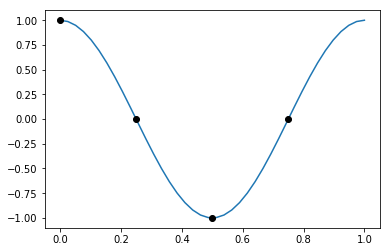

In [81]:
c, d = 0, 1
x = np.array([1, 0, -1, 0]).T
y = np.fft.fft(x) / np.sqrt(x.size)
a = np.array(y.real)
b = np.array(y.imag)
f = lambda t, a, b, c, d : a[0] / np.sqrt(a.size) + 2 / np.sqrt(a.size) * \
np.sum([a[k] * np.cos(2 * k * np.pi * (t - c) / (d - c)) - \
        b[k] * np.sin(2 * k * np.pi * (t - c) / (d - c)) for k in range(1, int(a.size / 2))]) + \
a[int(a.size / 2)] / np.sqrt(a.size) * np.cos(a.size * np.pi * (t - c) / (d - c))

t = np.linspace(c, d, 40)
xt = np.linspace(0, 1, 4, False)
data = [f(i, a, b, c, d) for i in t]

plt.plot(t, data)
plt.plot(xt, x, 'o', color='k')
plt.show()